In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd


# from the work assignment
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# import dataset

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [4]:
money = data.iloc[:,  [3,4]].values

In [5]:
money

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# step 2

<function matplotlib.pyplot.show(*args, **kw)>

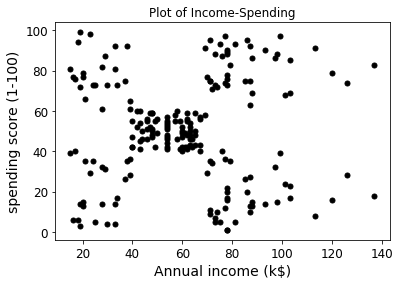

In [6]:
plt.scatter(money[:, 0], money[:, 1], s= 25, c= 'black')
plt.title('Plot of Income-Spending')
plt.xlabel('Annual income (k$)')
plt.ylabel('spending score (1-100)')
plt.show

# step 3

In [7]:
means = []

# YOU CAN'T USE A CLUSTER SIZE OF 1, ARE YOU SUPIT OR WHAT!!!!
# kill your self
#means.append(KMeans(n_clusters = 1, random_state=0).fit(money))

means.append(KMeans(n_clusters = 2, random_state=0).fit(money))
means.append(KMeans(n_clusters = 3, random_state=0).fit(money))
means.append(KMeans(n_clusters = 4, random_state=0).fit(money))
means.append(KMeans(n_clusters = 5, random_state=0).fit(money))
means.append(KMeans(n_clusters = 6, random_state=0).fit(money))
means.append(KMeans(n_clusters = 7, random_state=0).fit(money))
means.append(KMeans(n_clusters = 8, random_state=0).fit(money))
means.append(KMeans(n_clusters = 9, random_state=0).fit(money))
means.append(KMeans(n_clusters =10, random_state=0).fit(money))

#q = KMeans(n_clusters = 1, random_state=0).fit(money)

In [17]:
meanScores = []

number = 1
print("cluster size |", "score")
for item in means:
    number += 1
    print(str(number) + " |", item.score(money) / 1000)
    meanScores.append(item.score(money))
    

cluster size | score
2 | -181.3635959595959
3 | -106.34837306211121
4 | -73.67978903948837
5 | -44.44845544793379
6 | -37.239835542456106
7 | -30.273394312069993
8 | -25.018576334776295
9 | -21.850165282585564
10 | -19.664685196005493


In [9]:
print(meanScores)

[-181363.5959595959, -106348.3730621112, -73679.78903948837, -44448.45544793379, -37239.83554245611, -30273.39431206999, -25018.576334776295, -21850.165282585564, -19664.685196005492]


In [18]:
#q = silhouette_score(money, means[4].labels_)

silh_list = []
for i in range(0,9):
    silh_list.append(silhouette_score(money, means[i].labels_))
    
silh_list

[0.2968969162503008,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5393922132561455,
 0.5270287298101395,
 0.4575689106804838,
 0.4565077334305076,
 0.449795408266166]

ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

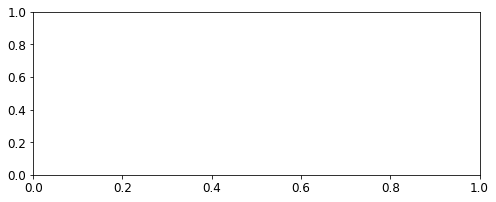

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silh_list, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()